# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [ ]:
import pandas as pd

df = pd.read_csv("/content/multiTimeline.csv", header=1)

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [ ]:
df.head()

,Mois,data science: (États-Unis)
0,2004-01,19
1,2004-02,16
2,2004-03,13
3,2004-04,8
4,2004-05,9


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [ ]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2004-01,19
1,2004-02,16
2,2004-03,13
3,2004-04,8
4,2004-05,9


## Plotting the data

👇 Plot the data

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


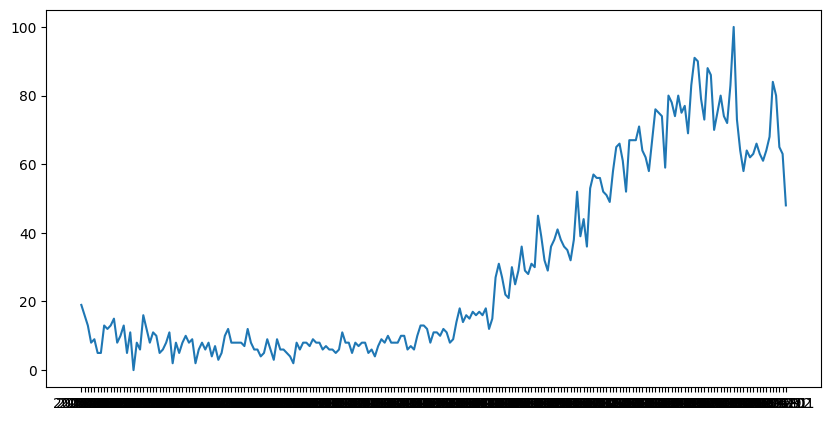

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df.ds, df.y)

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [ ]:
from fbprophet import Prophet
# Your code here
df_train = df[df.index < 0.7 * len(df)]
df_test = df[~df.index.isin(df_train.index)]

model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [52]:
future = model.make_future_dataframe(periods=24, freq="MS")
future

,ds
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
171,2018-04-01
172,2018-05-01
173,2018-06-01
174,2018-07-01


In [53]:
forecast = model.predict(future)

## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

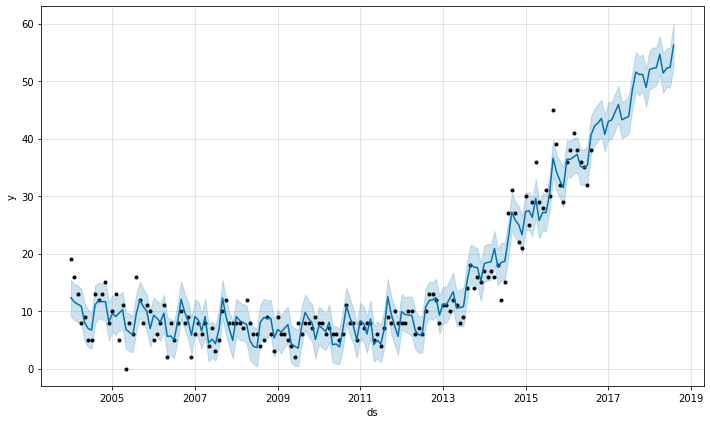

In [54]:
model.plot(forecast);

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

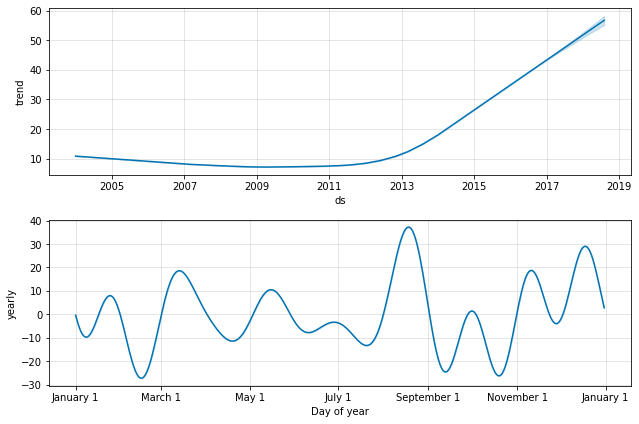

In [58]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [64]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
df_cv = cross_validation(model, horizon="365 days", period="180 days")
df_p = performance_metrics(df_cv)
# Your code here

INFO:fbprophet:Making 18 forecasts with cutoffs between 2007-03-17 00:00:00 and 2015-08-02 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

In [65]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,39 days,28.969321,5.382316,4.037658,0.273456,0.294428,0.47619
1,42 days,28.893689,5.375285,4.025798,0.273704,0.294428,0.52381
2,45 days,34.632230,5.884915,4.541488,0.393486,0.306390,0.47619
3,47 days,34.385541,5.863919,4.504632,0.387452,0.294428,0.47619
4,49 days,33.925535,5.824563,4.405700,0.380091,0.294428,0.50000
...,...,...,...,...,...,...,...
159,359 days,50.479982,7.104927,5.009497,0.292437,0.335731,0.50000
160,360 days,45.013901,6.709240,4.764322,0.301152,0.335731,0.52381
161,363 days,45.302831,6.730738,4.923244,0.302385,0.335731,0.50000
162,364 days,40.532905,6.366546,4.751583,0.307777,0.335731,0.47619


In [ ]:
# Plot results below
from fbprophet.plot import plot_cross_validation_metric

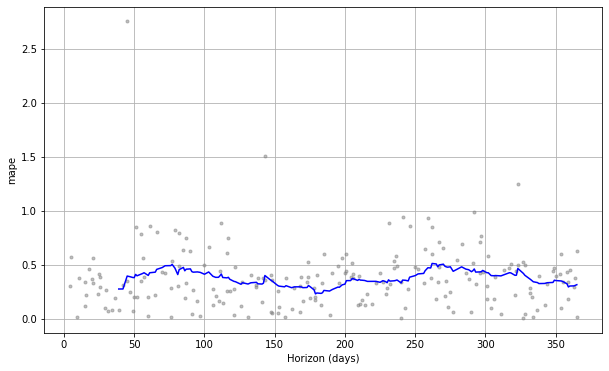

In [66]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

⚠️ Don't forget to push the challenge to GitHub once you're done 😄